In [269]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

from glob import glob

%matplotlib inline

In [270]:
images_path = glob("leaf_prediction/*.jpg")
images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in images_path]
for image in images:
    image[image > 1] = 1

In [278]:
ratio = 0.0009

ratios = []
mious = []
lens = []
for i in range(9):
    miou = 0
    mlen = 0
    for image in images:
        contour, _ = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contour = max(contour, key=cv2.contourArea)

        eps = ratio * cv2.arcLength(contour, True)

        poly = cv2.approxPolyDP(contour, eps, True)
        mlen += len(poly)

        poly_image = np.zeros(image.shape, np.uint8)
        poly_image = cv2.fillPoly(poly_image, [poly], 1)
        poly_image[poly_image > 1] = 1

        intersection = image * poly_image
        union = (image + poly_image)
        miou += cv2.countNonZero(intersection) / cv2.countNonZero(union)

    ratios.append('%.0E' % ratio)
    mious.append(miou / len(images))
    lens.append(mlen / len(images))
    ratio -= 0.0001

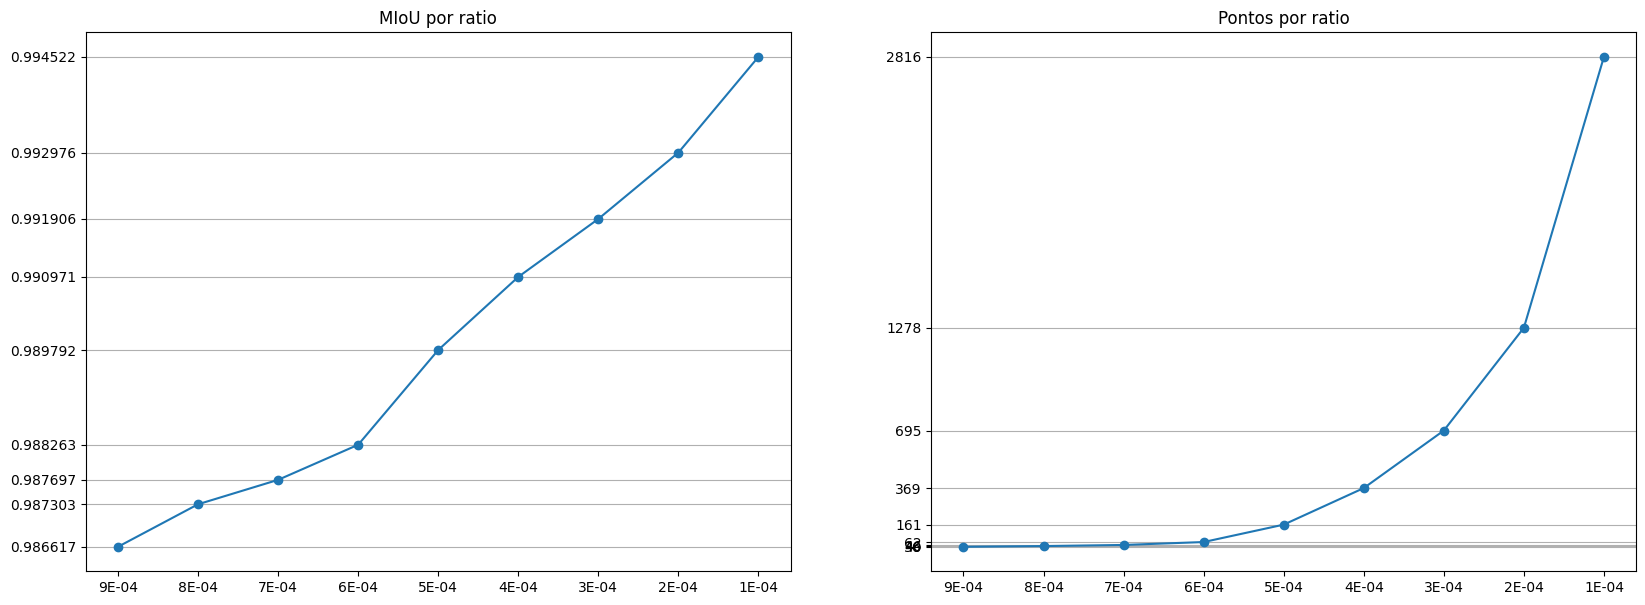

In [279]:
def plot(mious, ratios, lens):
    plt.figure(figsize=(20, 7))

    ax = plt.subplot(1, 2, 1)
    # plt.bar(rates, mious)
    plt.yticks(mious)
    plt.plot(ratios, mious, marker = 'o')
    plt.title("MIoU por ratio")
    plt.grid(axis='y')
    ax.set_axisbelow(True)

    ax = plt.subplot(1, 2, 2)
    plt.plot(ratios, lens, marker = 'o')
    plt.yticks(lens)
    plt.title("Pontos por ratio")
    plt.grid(axis='y')
    ax.set_axisbelow(True)

    plt.show()
plot(mious, ratios, lens)

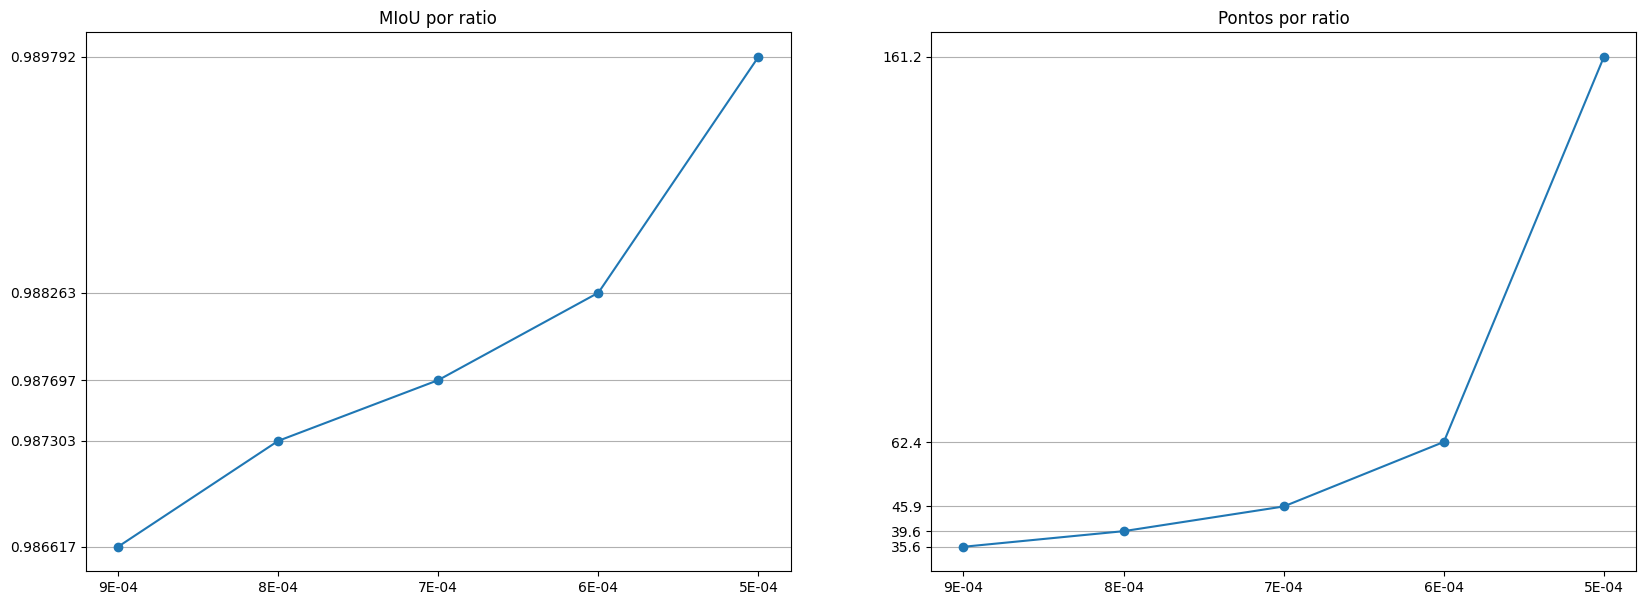

In [280]:
plot(mious[:5], ratios[:5], lens[:5])

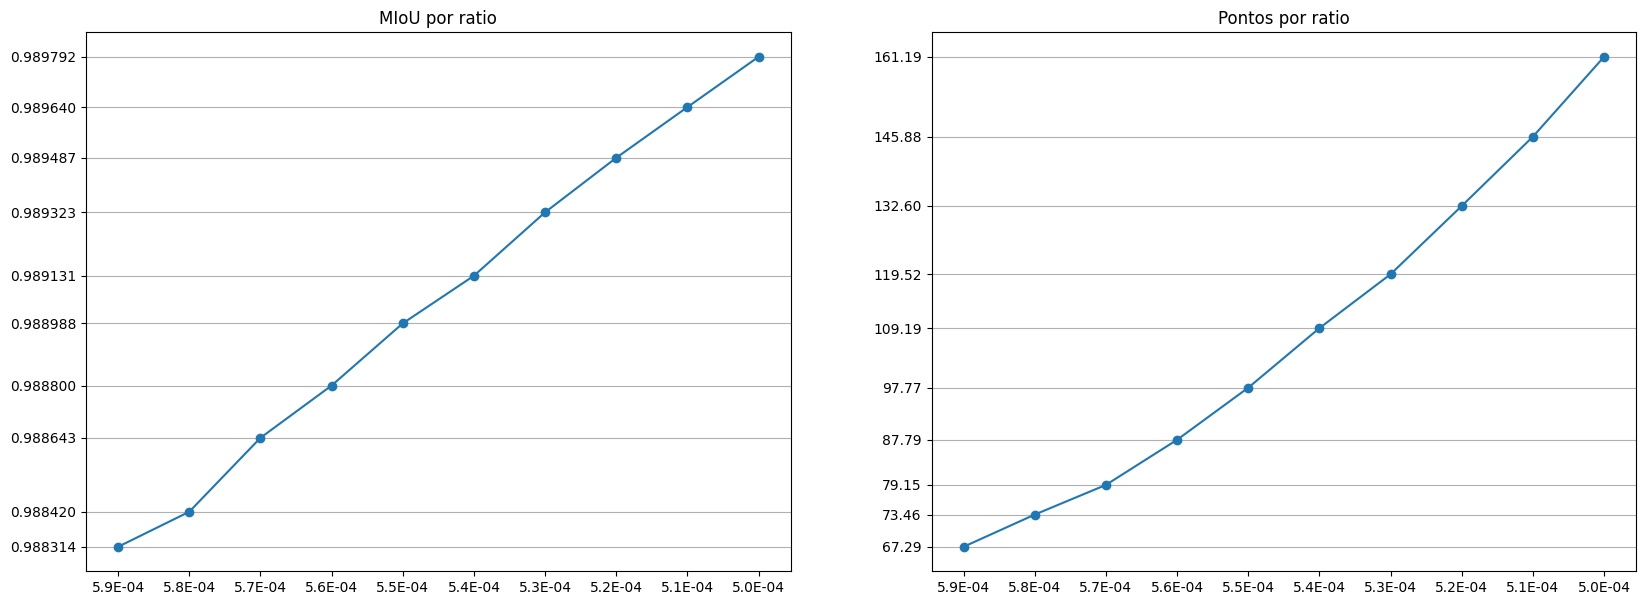

In [281]:
ratio = 0.00059

ratios = []
mious = []
lens = []
for i in range(10):
    miou = 0
    mlen = 0
    for image in images:
        contour, _ = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contour = max(contour, key=cv2.contourArea)

        eps = ratio * cv2.arcLength(contour, True)

        poly = cv2.approxPolyDP(contour, eps, True)
        mlen += len(poly)

        poly_image = np.zeros(image.shape, np.uint8)
        poly_image = cv2.fillPoly(poly_image, [poly], 1)
        poly_image[poly_image > 1] = 1

        intersection = image * poly_image
        union = (image + poly_image)
        miou += cv2.countNonZero(intersection) / cv2.countNonZero(union)

    ratios.append('%.1E' % ratio)
    mious.append(miou / len(images))
    lens.append(mlen / len(images))
    ratio -= 0.00001
plot(mious, ratios, lens)